<a href="https://colab.research.google.com/github/YasinnSoylu/Trend-Indicators-trading-strategy/blob/main/Trend_Indicators_trading_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
start_date = "2023-06-05"
end_date = "2023-06-9"
df =  yf.download("THYAO.IS", start=start_date, end=end_date,interval="1M")
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-05 09:55:00,154.500000,154.500000,154.500000,154.500000,154.500000,0
2023-06-05 10:00:00,154.600006,154.899994,154.000000,154.199997,154.199997,1575534
2023-06-05 10:01:00,154.199997,154.300003,153.899994,154.000000,154.000000,935238
2023-06-05 10:02:00,154.100006,154.600006,154.000000,154.500000,154.500000,813584
2023-06-05 10:03:00,154.600006,154.800003,154.399994,154.600006,154.600006,643032
...,...,...,...,...,...,...
2023-06-08 17:55:00,171.000000,171.300003,171.000000,171.300003,171.300003,314785
2023-06-08 17:56:00,171.300003,171.399994,171.199997,171.300003,171.300003,190406
2023-06-08 17:57:00,171.300003,171.399994,171.199997,171.199997,171.199997,171484


# Simple Moving Average

In [131]:
# Calculate 20-day and 50-day moving averages
df['SMA50'] = df['Close'].rolling(window=20).mean()
df['SMA25'] = df['Close'].rolling(window=10).mean()
df['SMA10'] = df['Close'].rolling(window=5).mean()


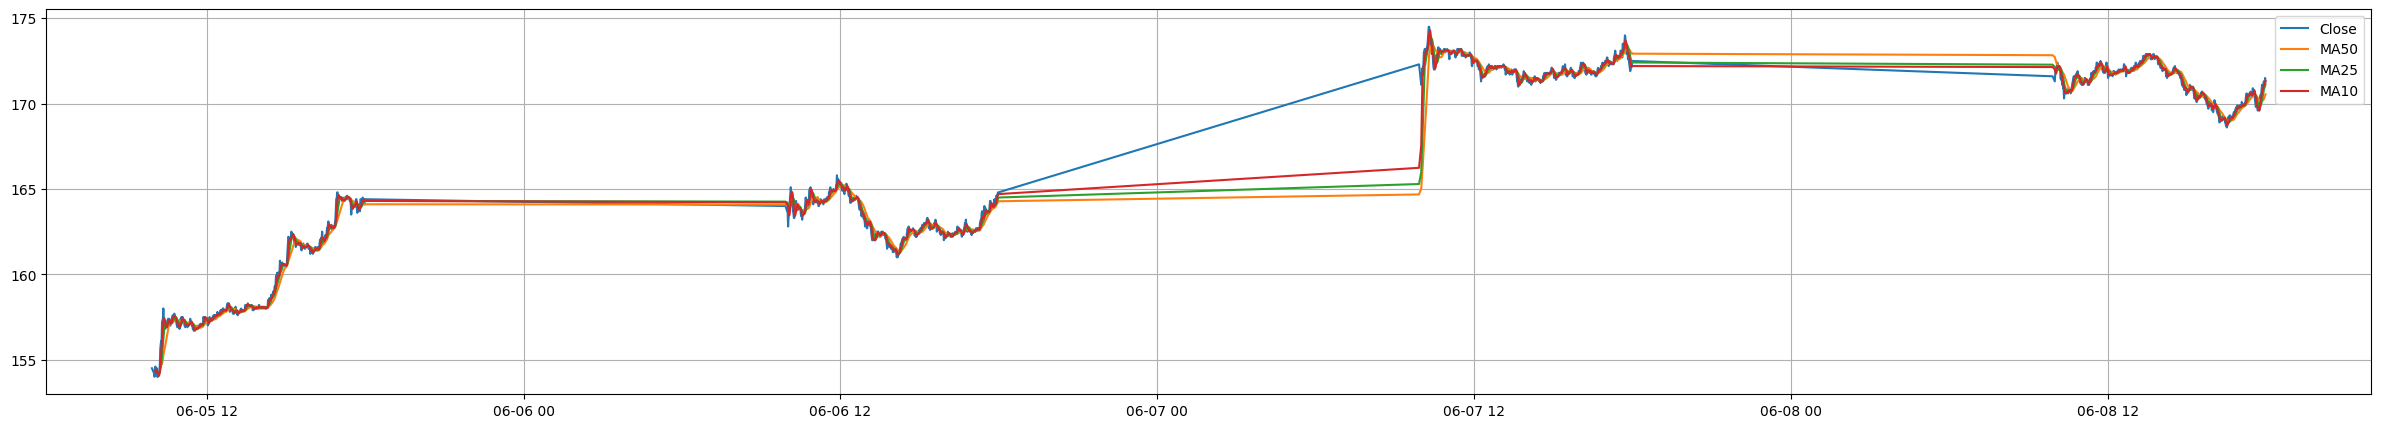

In [132]:
fig = plt.figure(figsize=(30,5))
plt.plot(df['Close'])
plt.plot(df['SMA50'])
plt.plot(df['SMA25'])
plt.plot(df['SMA10'])
plt.grid()

plt.legend(['Close', 'MA50','MA25','MA10'])
plt.show()

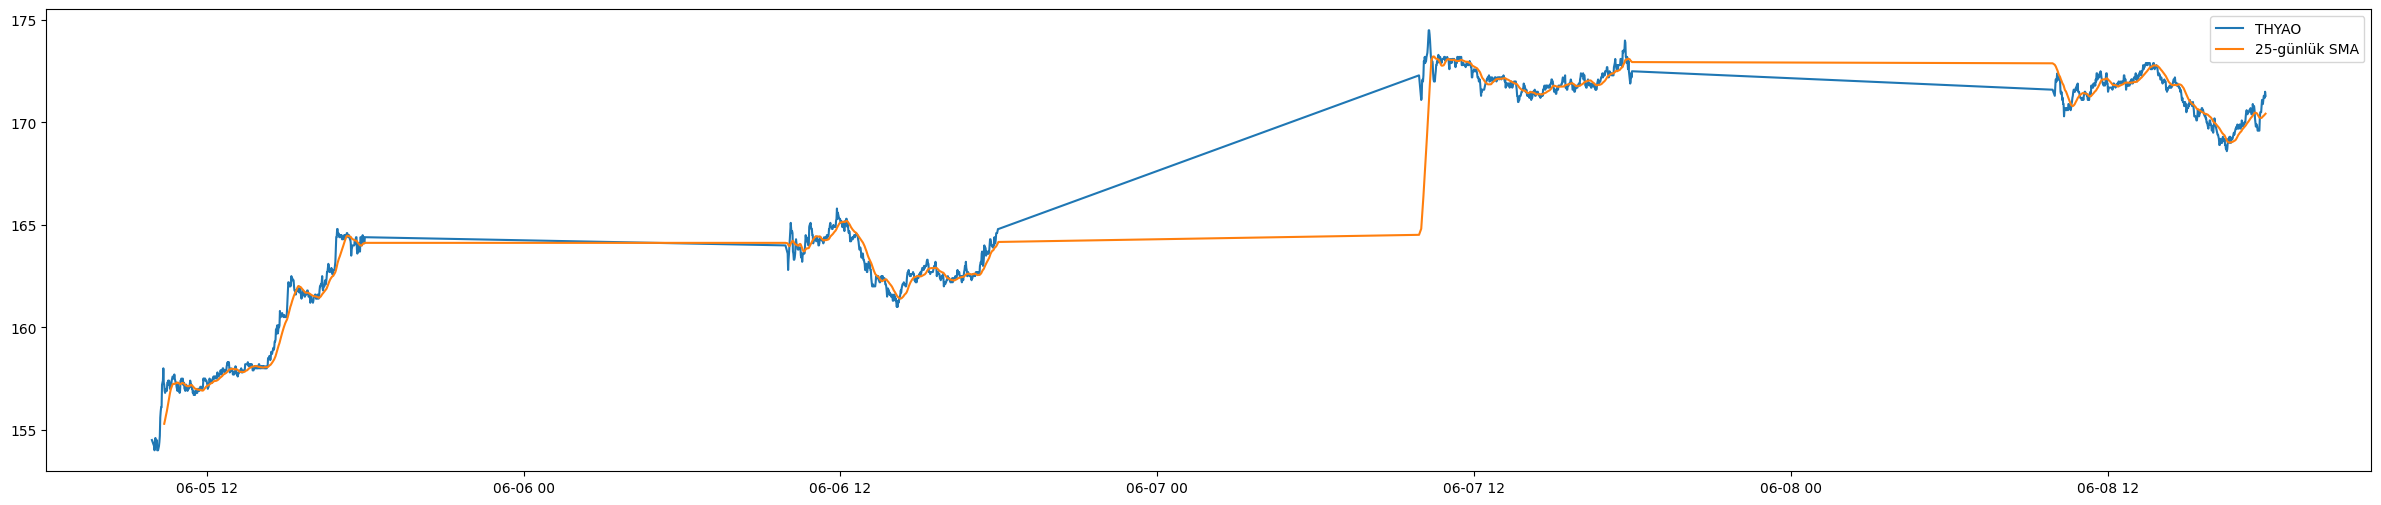

In [133]:
# Simple Moving Average (SMA) calculation
period = 25
sma = df["Close"].rolling(window=period).mean()

fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(df["Close"], label="THYAO")
ax.plot(sma, label=f"{period}-günlük SMA")
ax.legend()

In [134]:

# Calculating strategy performance
df["Position"] = 0
df["Position"][period:] = np.where(sma[period:] > df["Close"][period:], 1, 0)
df["Returns"] = df["Close"].pct_change() * df["Position"].shift(1)
strategy_returns = (df["Returns"] + 1).cumprod()

# Calculating indicator performance
asset_returns = (df["Close"].pct_change() + 1).cumprod()

# Calculating performance metrics
strategy_cumulative_returns = strategy_returns.iloc[-1]
asset_cumulative_returns = asset_returns.iloc[-1]
strategy_annual_returns = (strategy_cumulative_returns**(252/len(df)))-1
asset_annual_returns = (asset_cumulative_returns**(252/len(df)))-1
strategy_volatility = df["Returns"].std() * np.sqrt(252)
asset_volatility = df["Close"].pct_change().std() * np.sqrt(252)

<ipython-input-134-30f02fa41ff9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Position"][period:] = np.where(sma[period:] > df["Close"][period:], 1, 0)


In [135]:
adjusted_strategy_returns = strategy_cumulative_returns - 1
print(f"Strateji getirisi: {adjusted_strategy_returns:.2%}")
print(f"Strateji volatilitesi: {strategy_volatility:.2%}")


Strateji getirisi: 3.17%
Strateji volatilitesi: 1.04%


In [136]:
lot_size = 100

buy_dates = df[df["Position"].diff() == 1].index
sell_dates = df[df["Position"].diff() == -1].index

total_profit = 0
total_loss = 0

print("Alış ve Satış Tarihleri:")
for buy_date, sell_date in zip(buy_dates, sell_dates):
  buy_price = df.loc[buy_date, "Close"]
  sell_price = df.loc[sell_date, "Close"]
  profit_loss = (sell_price - buy_price) * lot_size
  percent_profit_loss = (profit_loss / (buy_price * lot_size)) * 100
  print(f"Alış Tarihi: {buy_date} - Satış Tarihi: {sell_date} - Kar/Zarar TL: {profit_loss:.2f} - Kar/Zarar Oranı: {percent_profit_loss:.2f}%")

  if profit_loss > 0:
    total_profit += profit_loss
  else:
    total_loss += profit_loss

net_profit_loss = total_profit + total_loss
print(f"\nToplam Edilen Kar: {total_profit:.2f}")
print(f"Toplam Edilen Zarar: {total_loss:.2f}")
print(f"Net Kar/Zarar: {net_profit_loss:.2f}")


Alış ve Satış Tarihleri:
Alış Tarihi: 2023-06-05 10:51:00 - Satış Tarihi: 2023-06-05 11:00:00 - Kar/Zarar TL: 30.00 - Kar/Zarar Oranı: 0.19%
Alış Tarihi: 2023-06-05 11:06:00 - Satış Tarihi: 2023-06-05 11:07:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 11:09:00 - Satış Tarihi: 2023-06-05 11:13:00 - Kar/Zarar TL: 20.00 - Kar/Zarar Oranı: 0.13%
Alış Tarihi: 2023-06-05 11:14:00 - Satış Tarihi: 2023-06-05 11:21:00 - Kar/Zarar TL: 20.00 - Kar/Zarar Oranı: 0.13%
Alış Tarihi: 2023-06-05 11:24:00 - Satış Tarihi: 2023-06-05 11:25:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 11:26:00 - Satış Tarihi: 2023-06-05 11:40:00 - Kar/Zarar TL: 0.00 - Kar/Zarar Oranı: 0.00%
Alış Tarihi: 2023-06-05 11:42:00 - Satış Tarihi: 2023-06-05 11:44:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 12:02:00 - Satış Tarihi: 2023-06-05 12:05:00 - Kar/Zarar TL: 30.00 - Kar/Zarar Oranı: 0.19%
Alış Tarihi: 2023-06-05 12:52:00 - Satış Tarihi:

# Moving Average Convergence Divergence (MACD)

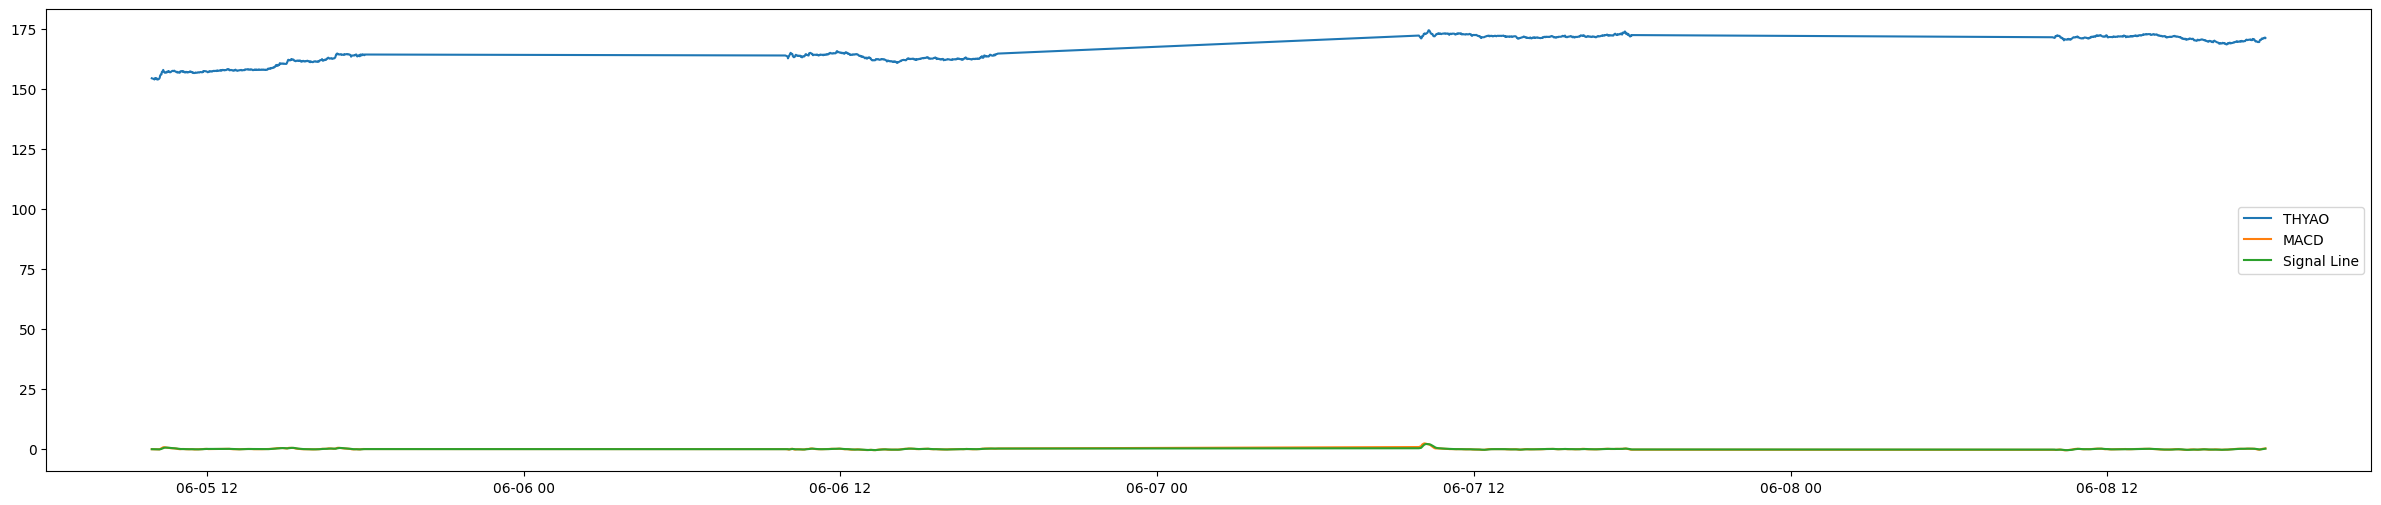

In [137]:
# MACD hesaplama
exp1 = df["Close"].ewm(span=12, adjust=False).mean()
exp2 = df["Close"].ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
signal = macd.ewm(span=9, adjust=False).mean()

# Göstergeleri grafiğe çizme
fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(df["Close"], label="THYAO")
ax.plot(macd, label="MACD")
ax.plot(signal, label="Signal Line")
ax.legend()

In [138]:
# Strateji performansını hesaplama
df["Position"] = np.where(macd > signal, 1, 0)
df["Returns"] = df["Close"].pct_change() * df["Position"].shift(1)
strategy_returns = (df["Returns"] + 1).cumprod()

# İndikatör performansını hesaplama
asset_returns = (df["Close"].pct_change() + 1).cumprod()

# Performans ölçütlerini hesaplama
strategy_cumulative_returns = strategy_returns.iloc[-1]
strategy_annual_returns = (strategy_cumulative_returns**(252/len(df)))-1
strategy_volatility = df["Returns"].std() * np.sqrt(252)

adjusted_strategy_returns = strategy_cumulative_returns - 1
print(f"Strateji getirisi: {adjusted_strategy_returns:.2%}")
print(f"Strateji volatilitesi: {strategy_volatility:.2%}")



Strateji getirisi: 4.86%
Strateji volatilitesi: 2.04%


In [139]:
lot_size = 100

buy_dates = df[df["Position"].diff() == 1].index
sell_dates = df[df["Position"].diff() == -1].index

total_profit = 0
total_loss = 0

print("Alış ve Satış Tarihleri:")
for buy_date, sell_date in zip(buy_dates, sell_dates):
  buy_price = df.loc[buy_date, "Close"]
  sell_price = df.loc[sell_date, "Close"]
  profit_loss = (sell_price - buy_price) * lot_size
  percent_profit_loss = (profit_loss / (buy_price * lot_size)) * 100
  print(f"Alış Tarihi: {buy_date} - Satış Tarihi: {sell_date} - Kar/Zarar TL: {profit_loss:.2f} - Kar/Zarar Oranı: {percent_profit_loss:.2f}%")

  if profit_loss > 0:
    total_profit += profit_loss
  else:
    total_loss += profit_loss

net_profit_loss = total_profit + total_loss
print(f"\nToplam Edilen Kar: {total_profit:.2f}")
print(f"Toplam Edilen Zarar: {total_loss:.2f}")
print(f"Net Kar/Zarar: {net_profit_loss:.2f}")


Alış ve Satış Tarihleri:
Alış Tarihi: 2023-06-05 10:13:00 - Satış Tarihi: 2023-06-05 10:28:00 - Kar/Zarar TL: 220.00 - Kar/Zarar Oranı: 1.42%
Alış Tarihi: 2023-06-05 11:02:00 - Satış Tarihi: 2023-06-05 11:08:00 - Kar/Zarar TL: -20.00 - Kar/Zarar Oranı: -0.13%
Alış Tarihi: 2023-06-05 11:21:00 - Satış Tarihi: 2023-06-05 11:27:00 - Kar/Zarar TL: -20.00 - Kar/Zarar Oranı: -0.13%
Alış Tarihi: 2023-06-05 11:39:00 - Satış Tarihi: 2023-06-05 12:01:00 - Kar/Zarar TL: 30.00 - Kar/Zarar Oranı: 0.19%
Alış Tarihi: 2023-06-05 12:09:00 - Satış Tarihi: 2023-06-05 12:11:00 - Kar/Zarar TL: -10.00 - Kar/Zarar Oranı: -0.06%
Alış Tarihi: 2023-06-05 12:13:00 - Satış Tarihi: 2023-06-05 12:27:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 12:31:00 - Satış Tarihi: 2023-06-05 12:40:00 - Kar/Zarar TL: -10.00 - Kar/Zarar Oranı: -0.06%
Alış Tarihi: 2023-06-05 12:46:00 - Satış Tarihi: 2023-06-05 12:52:00 - Kar/Zarar TL: -40.00 - Kar/Zarar Oranı: -0.25%
Alış Tarihi: 2023-06-05 13:06:00 - S

# Bollinger Bands

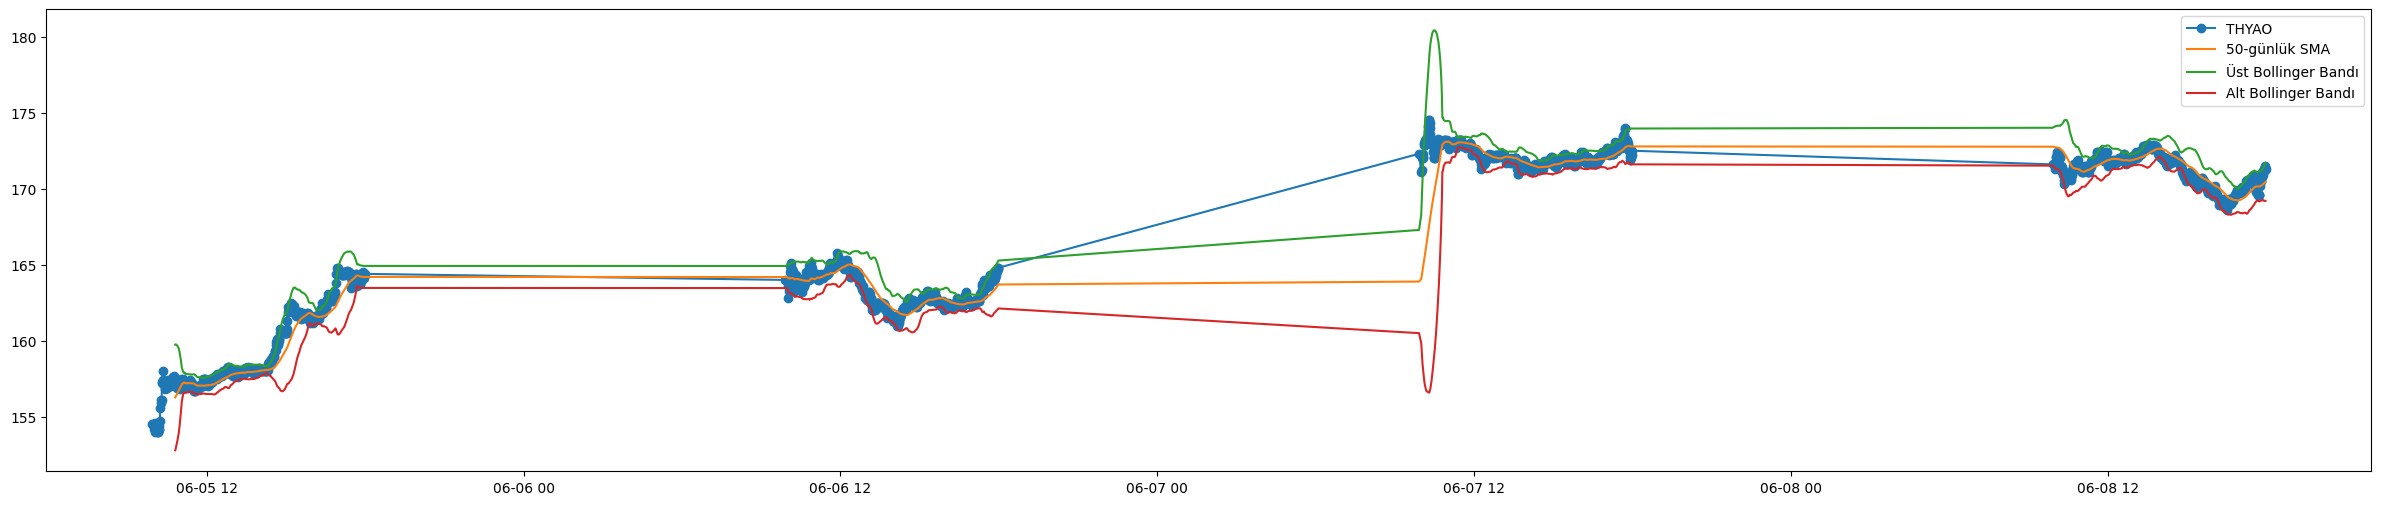

In [140]:
# Basit Hareketli Ortalama (SMA) ve Bollinger Bantları hesaplama
period = 50
sma = df["Close"].rolling(window=period).mean()
std = df["Close"].rolling(window=period).std()
upper_band = sma + 2.5*std
lower_band = sma - 2.5*std

# Göstergeyi grafiğe çizme
fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(df["Close"], label="THYAO",marker="o")
ax.plot(sma, label=f"{period}-günlük SMA")
ax.plot(upper_band, label="Üst Bollinger Bandı")
ax.plot(lower_band, label="Alt Bollinger Bandı")
ax.legend()


In [141]:
# Strateji performansını hesaplama
df["Position"] = 0
df["Position"][period:] = np.where(df["Close"][period:] < lower_band[period:], 1, 0)
df["Position"][period:] = np.where(df["Close"][period:] > upper_band[period:], -1, df["Position"][period:])
df["Returns"] = df["Close"].pct_change() * df["Position"].shift(1)
strategy_returns = (df["Returns"] + 1).cumprod()

# İndikatör performansını hesaplama
asset_returns = (df["Close"].pct_change() + 1).cumprod()

# Performans ölçütlerini hesaplama
strategy_cumulative_returns = strategy_returns.iloc[-1]
asset_cumulative_returns = asset_returns.iloc[-1]
strategy_annual_returns = (strategy_cumulative_returns**(252/len(df)))-1
asset_annual_returns = (asset_cumulative_returns**(252/len(df)))-1
strategy_volatility = df["Returns"].std() * np.sqrt(252)
asset_volatility = df["Close"].pct_change().std() * np.sqrt(252)

<ipython-input-141-ae5a493fd134>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Position"][period:] = np.where(df["Close"][period:] < lower_band[period:], 1, 0)
<ipython-input-141-ae5a493fd134>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Position"][period:] = np.where(df["Close"][period:] > upper_band[period:], -1, df["Position"][period:])


In [142]:
adjusted_strategy_returns = strategy_cumulative_returns - 1
print(f"Strateji getirisi: {adjusted_strategy_returns:.2%}")
print(f"Strateji volatilitesi: {strategy_volatility:.2%}")


Strateji getirisi: 2.81%
Strateji volatilitesi: 0.60%


In [143]:
lot_size = 100

buy_dates = df[df["Position"].diff() == 1].index
sell_dates = df[df["Position"].diff() == -1].index

total_profit = 0
total_loss = 0

print("Alış ve Satış Tarihleri:")
for buy_date, sell_date in zip(buy_dates, sell_dates):
  buy_price = df.loc[buy_date, "Close"]
  sell_price = df.loc[sell_date, "Close"]
  profit_loss = (sell_price - buy_price) * lot_size
  percent_profit_loss = (profit_loss / (buy_price * lot_size)) * 100
  print(f"Alış Tarihi: {buy_date} - Satış Tarihi: {sell_date} - Kar/Zarar TL: {profit_loss:.2f} - Kar/Zarar Oranı: {percent_profit_loss:.2f}%")

  if profit_loss > 0:
    total_profit += profit_loss
  else:
    total_loss += profit_loss

net_profit_loss = total_profit + total_loss
print(f"\nToplam Edilen Kar: {total_profit:.2f}")
print(f"Toplam Edilen Zarar: {total_loss:.2f}")
print(f"Net Kar/Zarar: {net_profit_loss:.2f}")

Alış ve Satış Tarihleri:
Alış Tarihi: 2023-06-05 14:24:00 - Satış Tarihi: 2023-06-05 14:19:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 14:28:00 - Satış Tarihi: 2023-06-05 14:26:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 14:32:00 - Satış Tarihi: 2023-06-05 14:30:00 - Kar/Zarar TL: 0.00 - Kar/Zarar Oranı: 0.00%
Alış Tarihi: 2023-06-05 14:41:00 - Satış Tarihi: 2023-06-05 14:34:00 - Kar/Zarar TL: -40.00 - Kar/Zarar Oranı: -0.25%
Alış Tarihi: 2023-06-05 14:47:00 - Satış Tarihi: 2023-06-05 14:46:00 - Kar/Zarar TL: 30.00 - Kar/Zarar Oranı: 0.19%
Alış Tarihi: 2023-06-05 16:20:00 - Satış Tarihi: 2023-06-05 16:19:00 - Kar/Zarar TL: 0.00 - Kar/Zarar Oranı: 0.00%
Alış Tarihi: 2023-06-05 16:23:00 - Satış Tarihi: 2023-06-05 16:21:00 - Kar/Zarar TL: 30.00 - Kar/Zarar Oranı: 0.19%
Alış Tarihi: 2023-06-05 16:34:00 - Satış Tarihi: 2023-06-05 16:33:00 - Kar/Zarar TL: 0.00 - Kar/Zarar Oranı: 0.00%
Alış Tarihi: 2023-06-05 16:37:00 - Satış Tarihi:

# Ichimoku Cloud

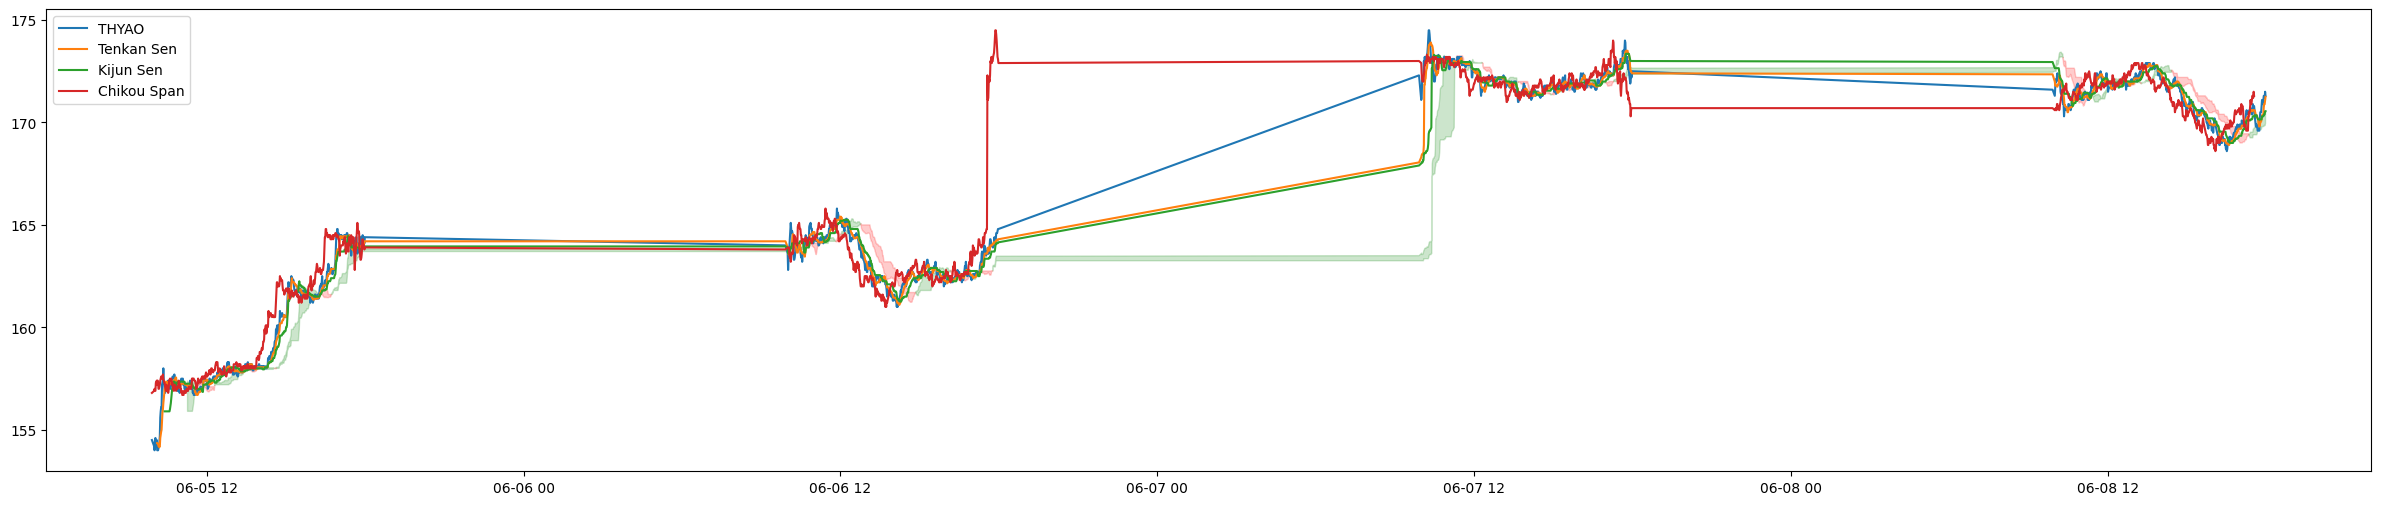

In [144]:
# Ichimoku Cloud hesaplama
high_9 = df["High"].rolling(window=9).max()
low_9 = df["Low"].rolling(window=9).min()
high_26 = df["High"].rolling(window=26).max()
low_26 = df["Low"].rolling(window=26).min()
tenkan_sen = (high_9 + low_9) / 2
kijun_sen = (high_26 + low_26) / 2
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
senkou_span_b = ((df["High"].rolling(window=52).max() + df["Low"].rolling(window=52).min()) / 2).shift(26)
chikou_span = df["Close"].shift(-26)

# Göstergeleri grafiğe çizme
fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(df["Close"], label="THYAO")
ax.plot(tenkan_sen, label="Tenkan Sen")
ax.plot(kijun_sen, label="Kijun Sen")
ax.fill_between(senkou_span_a.index, senkou_span_a, senkou_span_b, where=senkou_span_a >= senkou_span_b, color='green', alpha=0.2, interpolate=True)
ax.fill_between(senkou_span_a.index, senkou_span_a, senkou_span_b, where=senkou_span_a < senkou_span_b, color='red', alpha=0.2, interpolate=True)
ax.plot(chikou_span, label="Chikou Span")
ax.legend()

In [145]:

# Strateji performansını hesaplama
df["Position"] = np.where((tenkan_sen > kijun_sen) & (df["Close"] > senkou_span_a) & (df["Close"] > senkou_span_b) & (df["Close"].shift(-26) > df["Close"]), 1, 0)
df["Returns"] = df["Close"].pct_change() * df["Position"].shift(1)
strategy_returns = (df["Returns"] + 1).cumprod()

# İndikatör performansını hesaplama
asset_returns = (df["Close"].pct_change() + 1).cumprod()

# Performans ölçütlerini hesaplama
strategy_cumulative_returns = strategy_returns.iloc[-1]
asset_cumulative_returns = asset_returns.iloc[-1]
strategy_annual_returns = (strategy_cumulative_returns**(252/len(df)))-1
asset_annual_returns = (asset_cumulative_returns**(252/len(df)))-1
strategy_volatility = df["Returns"].std() * np.sqrt(252)
asset_volatility = df["Close"].pct_change().std() * np.sqrt(252)

In [146]:
adjusted_strategy_returns = strategy_cumulative_returns - 1
print(f"Strateji getirisi: {adjusted_strategy_returns:.2%}")
print(f"Strateji volatilitesi: {strategy_volatility:.2%}")


Strateji getirisi: 10.30%
Strateji volatilitesi: 1.81%


In [147]:
lot_size = 100

buy_dates = df[df["Position"].diff() == 1].index
sell_dates = df[df["Position"].diff() == -1].index

total_profit = 0
total_loss = 0

print("Alış ve Satış Tarihleri:")
for buy_date, sell_date in zip(buy_dates, sell_dates):
  buy_price = df.loc[buy_date, "Close"]
  sell_price = df.loc[sell_date, "Close"]
  profit_loss = (sell_price - buy_price) * lot_size
  percent_profit_loss = (profit_loss / (buy_price * lot_size)) * 100
  print(f"Alış Tarihi: {buy_date} - Satış Tarihi: {sell_date} - Kar/Zarar TL: {profit_loss:.2f} - Kar/Zarar Oranı: {percent_profit_loss:.2f}%")

  if profit_loss > 0:
    total_profit += profit_loss
  else:
    total_loss += profit_loss

net_profit_loss = total_profit + total_loss
print(f"\nToplam Edilen Kar: {total_profit:.2f}")
print(f"Toplam Edilen Zarar: {total_loss:.2f}")
print(f"Net Kar/Zarar: {net_profit_loss:.2f}")

Alış ve Satış Tarihleri:
Alış Tarihi: 2023-06-05 11:53:00 - Satış Tarihi: 2023-06-05 11:56:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 11:57:00 - Satış Tarihi: 2023-06-05 12:01:00 - Kar/Zarar TL: -20.00 - Kar/Zarar Oranı: -0.13%
Alış Tarihi: 2023-06-05 12:14:00 - Satış Tarihi: 2023-06-05 12:31:00 - Kar/Zarar TL: 40.00 - Kar/Zarar Oranı: 0.25%
Alış Tarihi: 2023-06-05 12:32:00 - Satış Tarihi: 2023-06-05 12:33:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 12:39:00 - Satış Tarihi: 2023-06-05 12:41:00 - Kar/Zarar TL: 0.00 - Kar/Zarar Oranı: 0.00%
Alış Tarihi: 2023-06-05 12:52:00 - Satış Tarihi: 2023-06-05 12:53:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 13:58:00 - Satış Tarihi: 2023-06-05 14:00:00 - Kar/Zarar TL: -20.00 - Kar/Zarar Oranı: -0.13%
Alış Tarihi: 2023-06-05 14:03:00 - Satış Tarihi: 2023-06-05 14:05:00 - Kar/Zarar TL: -10.00 - Kar/Zarar Oranı: -0.06%
Alış Tarihi: 2023-06-05 14:06:00 - Satış T

## Average Directional Index (ADX)

In [148]:
# Define function to calculate ADX
def calculate_adx(high, low, close, timeperiod=14):
    # Calculate the true range
    tr1 = np.abs(high - low)
    tr2 = np.abs(high - close.shift(1))
    tr3 = np.abs(low - close.shift(1))
    tr = np.maximum(tr1, np.maximum(tr2, tr3))

    # Calculate the directional movement
    dm_plus = high.diff()
    dm_plus[dm_plus < 0] = 0
    dm_minus = low.diff()
    dm_minus[dm_minus > 0] = 0
    dm_minus = np.abs(dm_minus)

    # Calculate the directional indicators
    di_plus = 100 * dm_plus.rolling(window=timeperiod).sum() / tr.rolling(window=timeperiod).sum()
    di_minus = 100 * dm_minus.rolling(window=timeperiod).sum() / tr.rolling(window=timeperiod).sum()

    # Calculate the DX and ADX values
    dx = 100 * np.abs(di_plus - di_minus) / (di_plus + di_minus)
    adx = dx.rolling(window=timeperiod).mean()

    return adx

# Calculate the ADX values
high = df["High"]
low = df["Low"]
close = df["Close"]
adx = calculate_adx(high, low, close)
import matplotlib.dates as mdates


<ipython-input-149-bd4e3485325d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)
<ipython-input-149-bd4e3485325d>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=60)


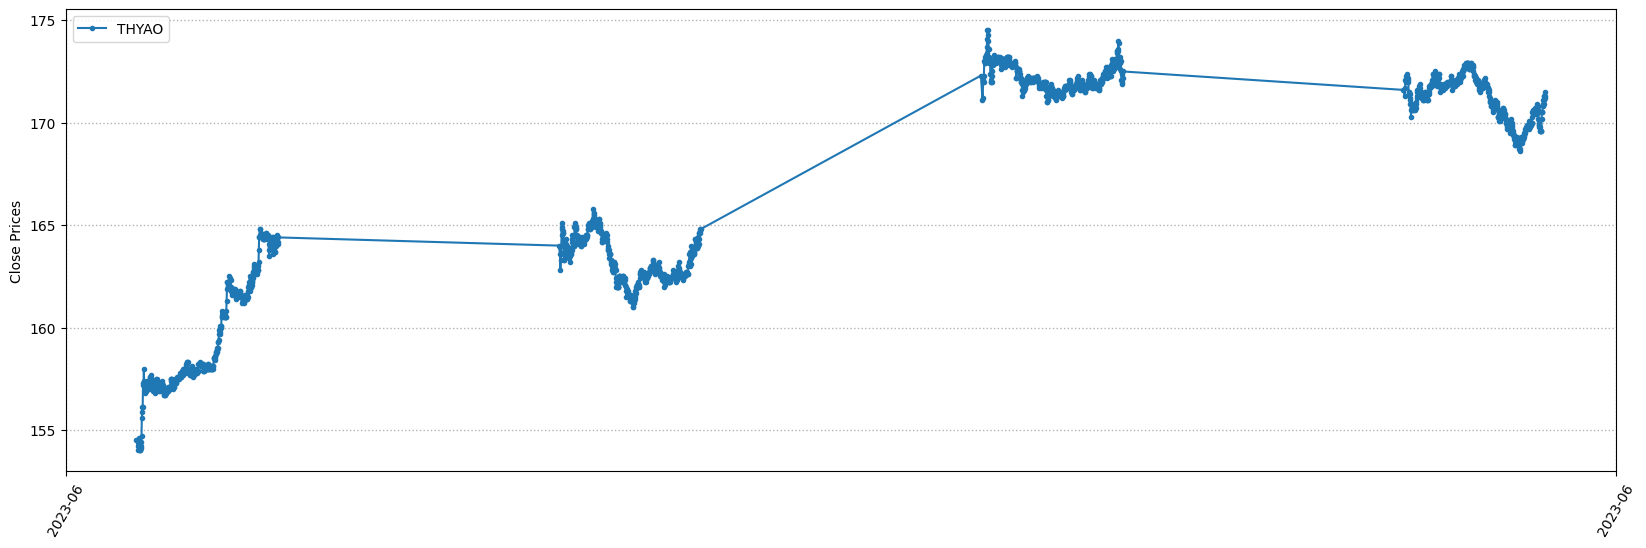

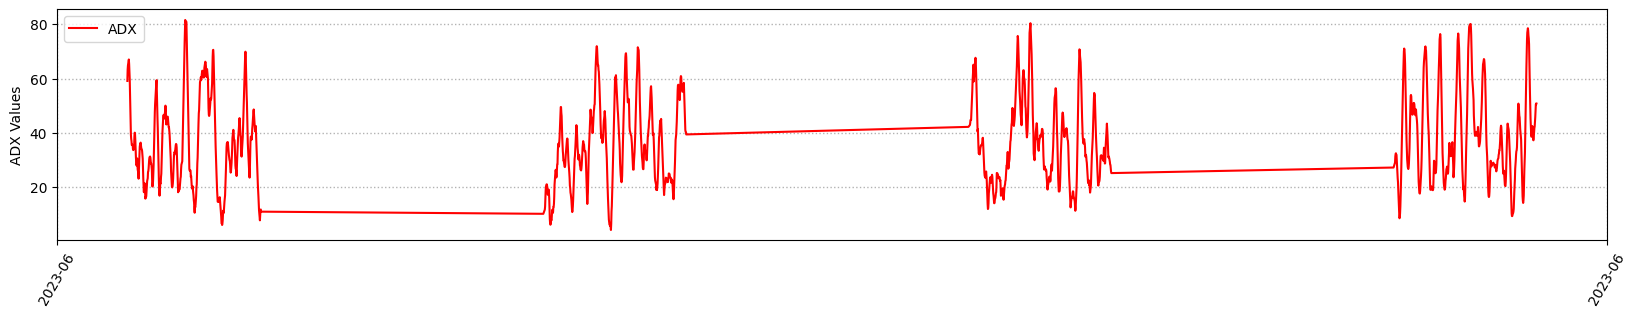

In [149]:
# Create the first plot with close prices
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.plot(df["Close"], label="THYAO",marker=".")
ax1.set_ylabel("Close Prices")
ax1.legend(loc="upper left")
ax1.grid(color="black", linestyle=":", linewidth=1, alpha=0.3)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)

# Create the second plot with ADX values
fig, ax2 = plt.subplots(figsize=(20, 3))
ax2.plot(adx, color="red", label="ADX")
ax2.set_ylabel("ADX Values")
ax2.legend(loc="upper left")
ax2.grid(color="black", linestyle=":", linewidth=1, alpha=0.3)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=60)

plt.show()



In [150]:
# Strateji performansını hesaplama
df["Position"] = np.where(adx > 25, 1, 0)
df["Returns"] = df["Close"].pct_change() * df["Position"].shift(1)
strategy_returns = (df["Returns"] + 1).cumprod()

# İndikatör performansını hesaplama
asset_returns = (df["Close"].pct_change() + 1).cumprod()

# Performans ölçütlerini hesaplama
strategy_cumulative_returns = strategy_returns.iloc[-1]
asset_cumulative_returns = asset_returns.iloc[-1]
strategy_annual_returns = (strategy_cumulative_returns**(252/len(df)))-1
asset_annual_returns = (asset_cumulative_returns**(252/len(df)))-1
strategy_volatility = df["Returns"].std() * np.sqrt(252)
asset_volatility = df["Close"].pct_change().std() * np.sqrt(252)

adjusted_strategy_returns = strategy_cumulative_returns - 1
print(f"Strateji getirisi: {adjusted_strategy_returns:.2%}")
print(f"Strateji volatilitesi: {strategy_volatility:.2%}")


Strateji getirisi: 9.26%
Strateji volatilitesi: 2.14%


In [151]:
lot_size = 100

buy_dates = df[df["Position"].diff() == 1].index
sell_dates = df[df["Position"].diff() == -1].index

total_profit = 0
total_loss = 0

print("Alış ve Satış Tarihleri:")
for buy_date, sell_date in zip(buy_dates, sell_dates):
  buy_price = df.loc[buy_date, "Close"]
  sell_price = df.loc[sell_date, "Close"]
  profit_loss = (sell_price - buy_price) * lot_size
  percent_profit_loss = (profit_loss / (buy_price * lot_size)) * 100
  print(f"Alış Tarihi: {buy_date} - Satış Tarihi: {sell_date} - Kar/Zarar TL: {profit_loss:.2f} - Kar/Zarar Oranı: {percent_profit_loss:.2f}%")

  if profit_loss > 0:
    total_profit += profit_loss
  else:
    total_loss += profit_loss

net_profit_loss = total_profit + total_loss
print(f"\nToplam Edilen Kar: {total_profit:.2f}")
print(f"Toplam Edilen Zarar: {total_loss:.2f}")
print(f"Net Kar/Zarar: {net_profit_loss:.2f}")

Alış ve Satış Tarihleri:
Alış Tarihi: 2023-06-05 10:26:00 - Satış Tarihi: 2023-06-05 11:04:00 - Kar/Zarar TL: 50.00 - Kar/Zarar Oranı: 0.32%
Alış Tarihi: 2023-06-05 11:05:00 - Satış Tarihi: 2023-06-05 11:20:00 - Kar/Zarar TL: -40.00 - Kar/Zarar Oranı: -0.25%
Alış Tarihi: 2023-06-05 11:36:00 - Satış Tarihi: 2023-06-05 11:50:00 - Kar/Zarar TL: 20.00 - Kar/Zarar Oranı: 0.13%
Alış Tarihi: 2023-06-05 11:55:00 - Satış Tarihi: 2023-06-05 12:13:00 - Kar/Zarar TL: 0.00 - Kar/Zarar Oranı: 0.00%
Alış Tarihi: 2023-06-05 12:22:00 - Satış Tarihi: 2023-06-05 12:55:00 - Kar/Zarar TL: 50.00 - Kar/Zarar Oranı: 0.32%
Alış Tarihi: 2023-06-05 13:02:00 - Satış Tarihi: 2023-06-05 13:16:00 - Kar/Zarar TL: 20.00 - Kar/Zarar Oranı: 0.13%
Alış Tarihi: 2023-06-05 13:28:00 - Satış Tarihi: 2023-06-05 14:01:00 - Kar/Zarar TL: -20.00 - Kar/Zarar Oranı: -0.13%
Alış Tarihi: 2023-06-05 14:22:00 - Satış Tarihi: 2023-06-05 15:28:00 - Kar/Zarar TL: 320.00 - Kar/Zarar Oranı: 2.02%
Alış Tarihi: 2023-06-05 16:00:00 - Satış Ta

# SuperTrend

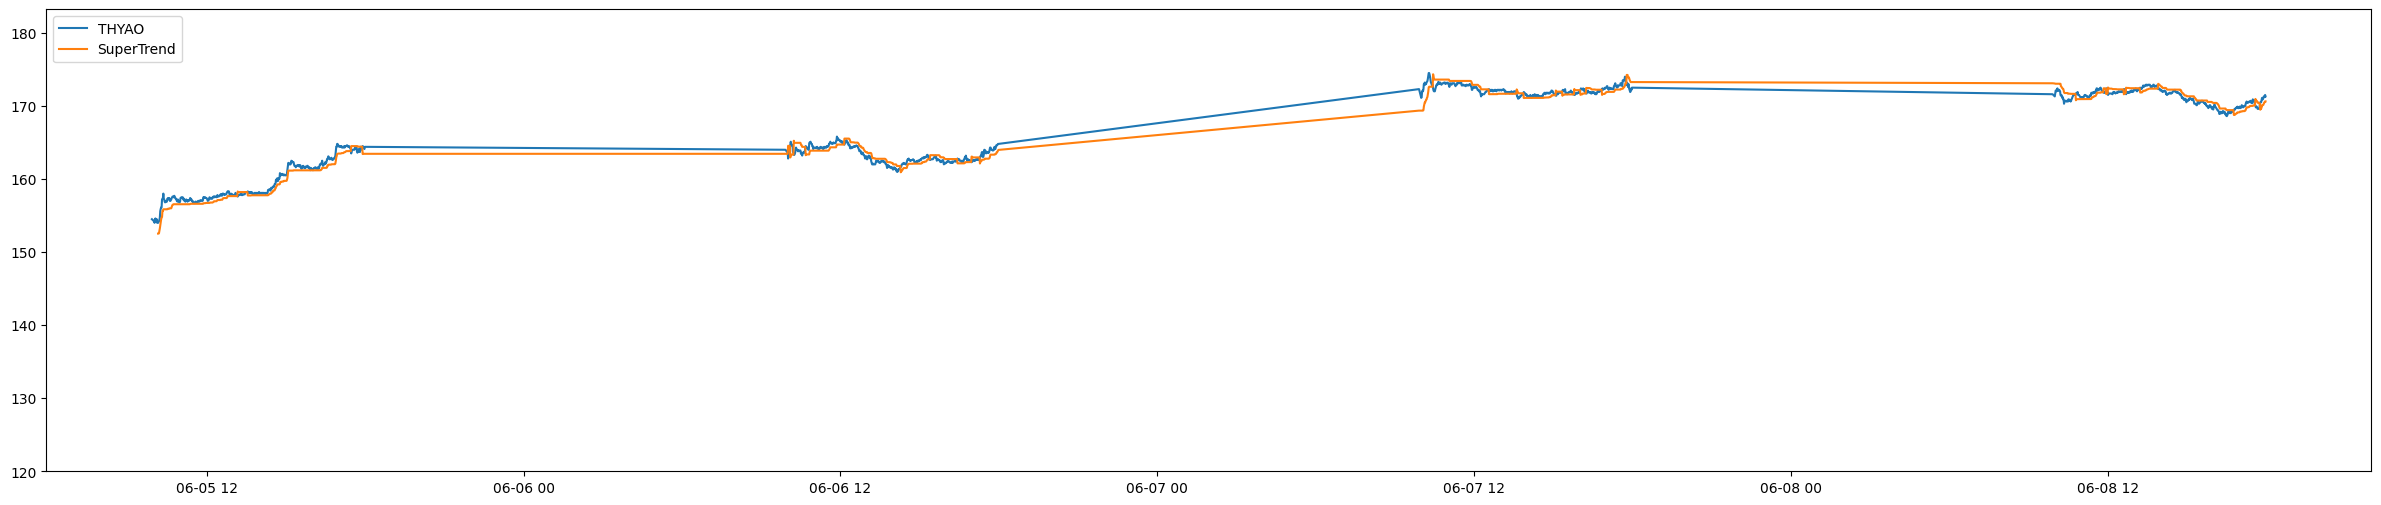

In [152]:
# SüperTrend hesaplama
df.ta.supertrend(length=10, multiplier=3, append=True)

fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(df["Close"], label="THYAO")
ax.plot(df["SUPERT_10_3.0"], label="SuperTrend")
ax.legend(loc="upper left")
ax.set_ylim(bottom=120)
plt.show()


In [153]:
# Strateji performansını hesaplama
df["Position"] = np.where(df["Close"] > df["SUPERT_10_3.0"], 1, 0)
df["Returns"] = df["Close"].pct_change() * df["Position"].shift(1)
strategy_returns = (df["Returns"] + 1).cumprod()

# İndikatör performansını hesaplama
asset_returns = (df["Close"].pct_change() + 1).cumprod()

# Performans ölçütlerini hesaplama
strategy_cumulative_returns = strategy_returns.iloc[-1]
asset_cumulative_returns = asset_returns.iloc[-1]
strategy_annual_returns = (strategy_cumulative_returns**(252/len(df)))-1
asset_annual_returns = (asset_cumulative_returns**(252/len(df)))-1
strategy_volatility = df["Returns"].std() * np.sqrt(252)
asset_volatility = df["Close"].pct_change().std() * np.sqrt(252)

adjusted_strategy_returns = strategy_cumulative_returns - 1
print(f"Strateji getirisi: {adjusted_strategy_returns:.2%}")
print(f"Strateji volatilitesi: {strategy_volatility:.2%}")


Strateji getirisi: 8.36%
Strateji volatilitesi: 2.11%


In [154]:
lot_size = 100

buy_dates = df[df["Position"].diff() == 1].index
sell_dates = df[df["Position"].diff() == -1].index

total_profit = 0
total_loss = 0

print("Alış ve Satış Tarihleri:")
for buy_date, sell_date in zip(buy_dates, sell_dates):
  buy_price = df.loc[buy_date, "Close"]
  sell_price = df.loc[sell_date, "Close"]
  profit_loss = (sell_price - buy_price) * lot_size
  percent_profit_loss = (profit_loss / (buy_price * lot_size)) * 100
  print(f"Alış Tarihi: {buy_date} - Satış Tarihi: {sell_date} - Kar/Zarar TL: {profit_loss:.2f} - Kar/Zarar Oranı: {percent_profit_loss:.2f}%")

  if profit_loss > 0:
    total_profit += profit_loss
  else:
    total_loss += profit_loss

net_profit_loss = total_profit + total_loss
print(f"\nToplam Edilen Kar: {total_profit:.2f}")
print(f"Toplam Edilen Zarar: {total_loss:.2f}")
print(f"Net Kar/Zarar: {net_profit_loss:.2f}")

Alış ve Satış Tarihleri:
Alış Tarihi: 2023-06-05 10:09:00 - Satış Tarihi: 2023-06-05 10:00:00 - Kar/Zarar TL: 20.00 - Kar/Zarar Oranı: 0.13%
Alış Tarihi: 2023-06-05 13:33:00 - Satış Tarihi: 2023-06-05 13:10:00 - Kar/Zarar TL: -70.00 - Kar/Zarar Oranı: -0.44%
Alış Tarihi: 2023-06-05 17:54:00 - Satış Tarihi: 2023-06-05 17:28:00 - Kar/Zarar TL: -100.00 - Kar/Zarar Oranı: -0.61%
Alış Tarihi: 2023-06-06 10:06:00 - Satış Tarihi: 2023-06-06 10:01:00 - Kar/Zarar TL: -210.00 - Kar/Zarar Oranı: -1.27%
Alış Tarihi: 2023-06-06 10:41:00 - Satış Tarihi: 2023-06-06 10:14:00 - Kar/Zarar TL: -120.00 - Kar/Zarar Oranı: -0.73%
Alış Tarihi: 2023-06-06 14:17:00 - Satış Tarihi: 2023-06-06 12:09:00 - Kar/Zarar TL: 290.00 - Kar/Zarar Oranı: 1.79%
Alış Tarihi: 2023-06-06 16:26:00 - Satış Tarihi: 2023-06-06 15:24:00 - Kar/Zarar TL: -20.00 - Kar/Zarar Oranı: -0.12%
Alış Tarihi: 2023-06-06 17:17:00 - Satış Tarihi: 2023-06-06 16:58:00 - Kar/Zarar TL: -70.00 - Kar/Zarar Oranı: -0.43%
Alış Tarihi: 2023-06-07 12:34:0

# Parabolic SAR

Strateji getirisi: 6.73%
Strateji volatilitesi: 2.08%


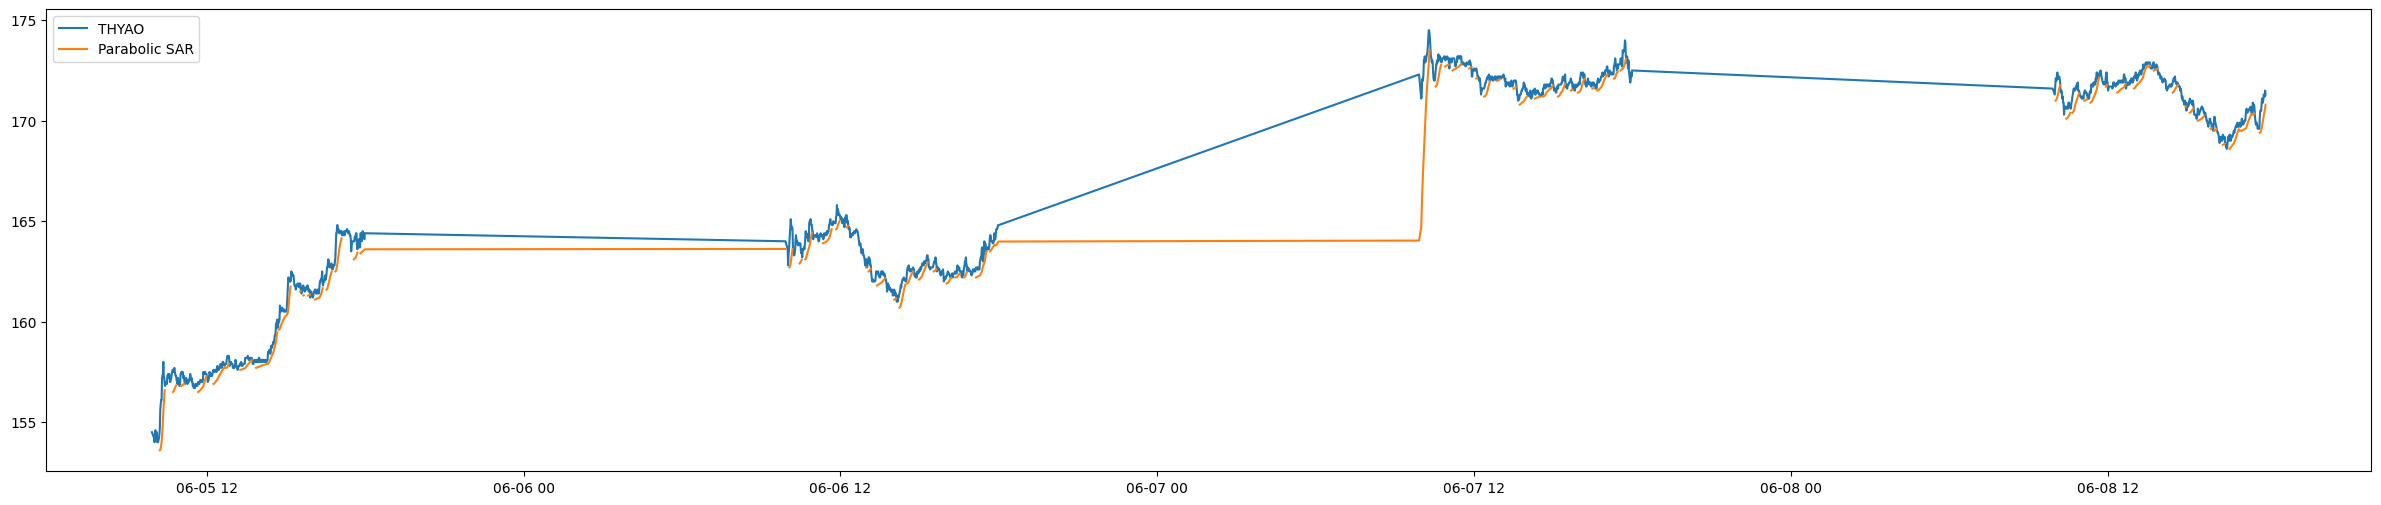

In [155]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta


# Parabolic SAR hesaplama
df.ta.psar(append=True)

# Göstergeleri grafiğe çizme
fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(df["Close"], label="THYAO")
ax.plot(df["PSARl_0.02_0.2"], label="Parabolic SAR")
ax.legend(loc="upper left")

# Strateji performansını hesaplama
df["Position"] = np.where(df["Close"] > df["PSARl_0.02_0.2"], 1, 0)
df["Returns"] = df["Close"].pct_change() * df["Position"].shift(1)
strategy_returns = (df["Returns"] + 1).cumprod()

# İndikatör performansını hesaplama
asset_returns = (df["Close"].pct_change() + 1).cumprod()

# Performans ölçütlerini hesaplama
strategy_cumulative_returns = strategy_returns.iloc[-1]
asset_cumulative_returns = asset_returns.iloc[-1]
strategy_annual_returns = (strategy_cumulative_returns**(252/len(df)))-1
asset_annual_returns = (asset_cumulative_returns**(252/len(df)))-1
strategy_volatility = df["Returns"].std() * np.sqrt(252)
asset_volatility = df["Close"].pct_change().std() * np.sqrt(252)

adjusted_strategy_returns = strategy_cumulative_returns - 1
print(f"Strateji getirisi: {adjusted_strategy_returns:.2%}")
print(f"Strateji volatilitesi: {strategy_volatility:.2%}")

plt.show()


In [156]:
lot_size = 100

buy_dates = df[df["Position"].diff() == 1].index
sell_dates = df[df["Position"].diff() == -1].index

total_profit = 0
total_loss = 0

print("Alış ve Satış Tarihleri:")
for buy_date, sell_date in zip(buy_dates, sell_dates):
  buy_price = df.loc[buy_date, "Close"]
  sell_price = df.loc[sell_date, "Close"]
  profit_loss = (sell_price - buy_price) * lot_size
  percent_profit_loss = (profit_loss / (buy_price * lot_size)) * 100
  print(f"Alış Tarihi: {buy_date} - Satış Tarihi: {sell_date} - Kar/Zarar TL: {profit_loss:.2f} - Kar/Zarar Oranı: {percent_profit_loss:.2f}%")

  if profit_loss > 0:
    total_profit += profit_loss
  else:
    total_loss += profit_loss

net_profit_loss = total_profit + total_loss
print(f"\nToplam Edilen Kar: {total_profit:.2f}")
print(f"Toplam Edilen Zarar: {total_loss:.2f}")
print(f"Net Kar/Zarar: {net_profit_loss:.2f}")

Alış ve Satış Tarihleri:
Alış Tarihi: 2023-06-05 10:00:00 - Satış Tarihi: 2023-06-05 10:01:00 - Kar/Zarar TL: -20.00 - Kar/Zarar Oranı: -0.13%
Alış Tarihi: 2023-06-05 10:13:00 - Satış Tarihi: 2023-06-05 10:25:00 - Kar/Zarar TL: 210.00 - Kar/Zarar Oranı: 1.36%
Alış Tarihi: 2023-06-05 10:43:00 - Satış Tarihi: 2023-06-05 10:51:00 - Kar/Zarar TL: -50.00 - Kar/Zarar Oranı: -0.32%
Alış Tarihi: 2023-06-05 11:01:00 - Satış Tarihi: 2023-06-05 11:09:00 - Kar/Zarar TL: -40.00 - Kar/Zarar Oranı: -0.25%
Alış Tarihi: 2023-06-05 11:40:00 - Satış Tarihi: 2023-06-05 12:00:00 - Kar/Zarar TL: 30.00 - Kar/Zarar Oranı: 0.19%
Alış Tarihi: 2023-06-05 12:15:00 - Satış Tarihi: 2023-06-05 12:41:00 - Kar/Zarar TL: 30.00 - Kar/Zarar Oranı: 0.19%
Alış Tarihi: 2023-06-05 12:43:00 - Satış Tarihi: 2023-06-05 12:51:00 - Kar/Zarar TL: 10.00 - Kar/Zarar Oranı: 0.06%
Alış Tarihi: 2023-06-05 13:06:00 - Satış Tarihi: 2023-06-05 13:07:00 - Kar/Zarar TL: -20.00 - Kar/Zarar Oranı: -0.13%
Alış Tarihi: 2023-06-05 13:16:00 - Sat